<a href="https://colab.research.google.com/github/sowmika-reddy/project/blob/main/image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install bing-image-downloader

In [ ]:
!mkdir images_train

mkdir: cannot create directory ‘images_train’: File exists


In [ ]:
from bing_image_downloader import downloader
downloader.download("rugby ball leather",limit=30,output_dir='images',adult_filter_off=True)



[!!]Indexing page: 1

[%] Indexed 12 Images on Page 1.


[%] Downloading Image #1 from https://www.webbellisrugby.co.uk/wp-content/uploads/2016/04/leather-rugby-ball-puntabout.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://img1.etsystatic.com/013/0/7864717/il_570xN.431074825_ewio.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://cdn.shopify.com/s/files/1/0226/2169/products/Naismith_2048x2048_V3_1024x1024.jpg?v=1556562051
[%] File Downloaded !

[%] Downloading Image #4 from https://www.sportsattack.com/wp-content/uploads/2015/02/SportsAttack_leather_baseball_small-300x300.jpg
[%] File Downloaded !

[%] Downloading Image #5 from http://4.bp.blogspot.com/-F3Bvwkp5WSc/UE38SD2VIJI/AAAAAAAAA1A/GjnIOyYI2js/s1600/test_cb_edited-1.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://images.antiquesatlas.com/dealer-stock-images/puckeringsantiques/Antique_Novelty_Travel_Inkwell_as584a1568z-1.jpg
[%] File Downloaded !

[%] Downloading Image #7 from ht

In [ ]:
#preprocessing
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize
target = []
images = []
flat_data = []
DATADIR='/content/images'
CATEGORIES = ['Prabhas Rebel','Amazing Roses','rugby ball leather']
for category in CATEGORIES:
  class_num = CATEGORIES.index(category)
  path = os.path.join(DATADIR,category)
  for img in os.listdir(path):
    img_array=imread(os.path.join(path,img))
    #plt.imshow(img_array)
    img_resized = resize(img_array,(150,150,3))
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)
flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)   


# New Section

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,test_size=0.3,random_state=109)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
              {'C':[1,10,100,1000],'kernel':['linear']},
              {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']},
]
svc=svm.SVC(probability=True)
clf=GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
import pickle 
pickle.dump(clf,open('img_model.p','wb'))

In [ ]:
model = pickle.load(open('img_model.p','rb'))

Enter your URLhttps://i.pinimg.com/originals/01/4c/aa/014caa6ca423d3d1818aef468b75966e.jpg
(787, 613, 3)
 PREDICTED OUTPUT: Amazing Roses


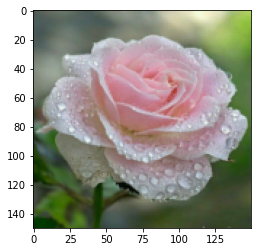

In [ ]:
flat_data = []
url = input('Enter your URL')
img = imread(url)
img_resized=resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data=np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f' PREDICTED OUTPUT: {y_out}')